## Домашнее задание к лекции «Корреляция и корреляционный анализ»

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(r'C:\Users\Лина\OneDrive\Рабочий стол\study\python\статистика\corr_regr\water.csv')
df.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  61 non-null     int64 
 1   location    61 non-null     object
 2   town        61 non-null     object
 3   mortality   61 non-null     int64 
 4   hardness    61 non-null     int64 
dtypes: int64(3), object(2)
memory usage: 2.5+ KB


### Задание 1.
**Ответить на вопрос: есть ли связь между жёсткостью воды и средней годовой смертностью?**
- Построить точечный график
- Рассчитать коэффициенты корреляции Пирсона и Спирмена
- Построить модель линейной регрессии
- Рассчитать коэффициент детерминации
- Вывести график остатков

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

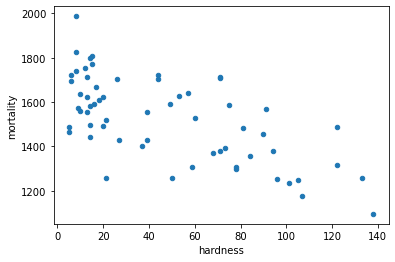

In [6]:
df.plot(kind='scatter', x='hardness', y='mortality')

In [7]:
# на графике видим тенденцию к обратной линейной зависимости - чем ниже жесткость воды, тем выше смертность

In [8]:
df[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [9]:
df[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [10]:
df[['hardness', 'mortality']].corr(method='kendall')

,hardness,mortality
hardness,1.000000,-0.453753
mortality,-0.453753,1.000000


In [11]:
# коэффициенты подтверждают первичные выводы о закономерности

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
X = df[['hardness']]
y = df['mortality']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [15]:
X_train.shape

(42, 1)

In [16]:
model = LinearRegression()
model.fit(X_train, y_train)  # метод обучается на данных и подбирает оптимальные коэффициенты

LinearRegression()

In [17]:
print(model.coef_[0], model.intercept_)

-3.1316708721378266 1668.9722977277095


In [18]:
# т.е. получили уравнение прямой вида y = -3.13 * x + 1668

In [19]:
y_pred = model.predict(X_test)
y_pred

array([1340.14685615, 1637.65558901, 1625.12890552, 1531.17877935,
       1424.7019697 , 1606.33888028, 1252.46007173, 1434.09698232,
       1603.20720941, 1650.18227249, 1484.20371627, 1415.30695708,
       1546.83713371, 1625.12890552, 1446.62366581, 1546.83713371,
       1637.65558901, 1621.99723465, 1352.67353964])

In [20]:
model.score(X_test, y_test) # метод возвращает значение коэффициента детерминации
# получили довольно невысокое значение

0.5046490611017092

In [21]:
# сравним результаты на глаз
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
0,105,1340.146856,1247
5,10,1637.655589,1558
46,14,1625.128906,1495
31,44,1531.178779,1702
13,78,1424.701970,1307
55,20,1606.338880,1625
34,133,1252.460072,1259
49,75,1434.096982,1587
12,21,1603.207209,1519
40,6,1650.182272,1696


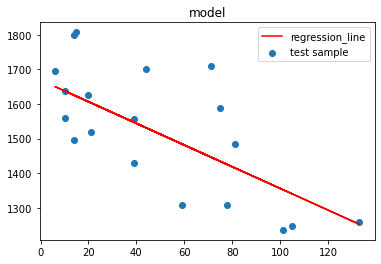

In [22]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('model')
plt.legend(['regression_line', 'test sample'])

In [23]:
# остатки
resid = y_test - y_pred
resid

0     -93.146856
5     -79.655589
46   -130.128906
31    170.821221
13   -117.701970
55     18.661120
34      6.539928
49    152.903018
12    -84.207209
40     45.817728
33   -175.203716
59     69.693043
16      8.162866
3     174.871094
53    262.376334
17   -118.837134
8      -0.655589
6     185.002765
41   -116.673540
Name: mortality, dtype: float64

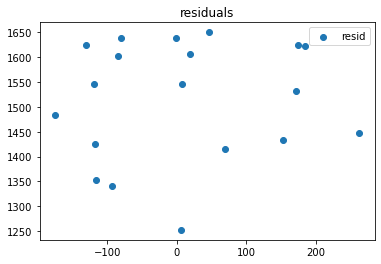

In [24]:
plt.scatter(resid, y_pred)
plt.title('residuals')
plt.legend(['resid'])

In [25]:
# остатки довольно хаотичны, что говорит о неплохом качестве модели, 
# в целом взаимосвязь качества воды и смертности можно проследить, но связь не достаточно сильная,
# чтобы можно было делатьотносительно точное предсказание одной величины через другую по полученной модели

### Задание 2.
**Ответить на вопрос: сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?**

- Разделить данные на 2 группы
- Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [30]:
df_n = df[df.location == 'North' ]
df_s = df[df.location == 'South']

<AxesSubplot:xlabel='hardness', ylabel='mortality'>

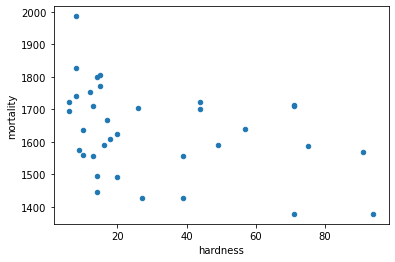

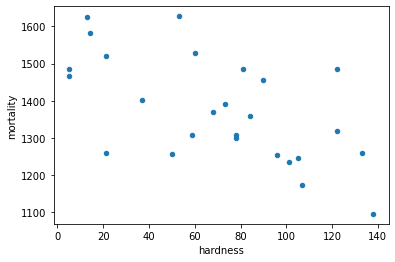

In [31]:
df_n.plot(kind='scatter', x='hardness', y='mortality')
df_s.plot(kind='scatter', x='hardness', y='mortality')

In [7]:
# на графике видим более выраженную тенденцию к обратной линейной зависимости для южных

In [34]:
print(df_n[['hardness', 'mortality']].corr())
print(df_s[['hardness', 'mortality']].corr())

           hardness  mortality
hardness   1.000000  -0.368598
mortality -0.368598   1.000000
           hardness  mortality
hardness   1.000000  -0.602153
mortality -0.602153   1.000000


In [35]:
print(df_n[['hardness', 'mortality']].corr(method='spearman'))
print(df_s[['hardness', 'mortality']].corr(method='spearman'))

           hardness  mortality
hardness   1.000000  -0.404208
mortality -0.404208   1.000000
           hardness  mortality
hardness   1.000000  -0.595723
mortality -0.595723   1.000000


In [36]:
print(df_n[['hardness', 'mortality']].corr(method='kendall'))
print(df_s[['hardness', 'mortality']].corr(method='kendall'))

           hardness  mortality
hardness   1.000000  -0.283058
mortality -0.283058   1.000000
           hardness  mortality
hardness   1.000000  -0.440315
mortality -0.440315   1.000000


In [ ]:
# для юга коэффициенты выше

In [ ]:
# построим две модели

In [37]:
X = df_n[['hardness']]
y = df_n['mortality']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [39]:
X_train.shape

(24, 1)

In [40]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [41]:
print(model.coef_[0], model.intercept_)

-1.9768622600638235 1688.150229031281


In [ ]:
# свободный член тот же, что и на модели для всей выборки

In [42]:
y_pred = model.predict(X_test)
y_pred

array([1672.33533095, 1670.35846869, 1660.47415739, 1676.28905547,
       1656.52043287, 1547.79300857, 1601.16828959, 1672.33533095,
       1611.05260089, 1658.49729513, 1611.05260089])

In [43]:
model.score(X_test, y_test) 

0.018885304285745863

In [ ]:
# очень низкое значение коэффициента детерминации

In [44]:
# сравним результаты на глаз
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
45,8,1672.335331,1987
23,9,1670.358469,1574
43,14,1660.474157,1444
36,6,1676.289055,1724
26,16,1656.520433,1591
50,71,1547.793009,1713
31,44,1601.168290,1702
22,8,1672.335331,1742
16,39,1611.052601,1555
28,15,1658.497295,1772


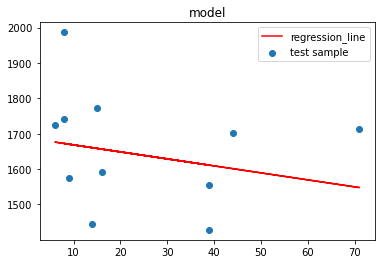

In [45]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('model')
plt.legend(['regression_line', 'test sample'])

In [ ]:
# данных довольно мало для построения качественной модели

In [46]:
# остатки
resid = y_test - y_pred

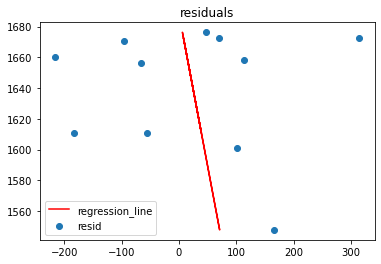

In [49]:
plt.scatter(resid, y_pred)
plt.title('residuals')
plt.plot(X_test, y_pred, c='r')
plt.legend(['regression_line', 'resid'])

In [57]:
X = df_s[['hardness']]
y = df_s['mortality']

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=40)

In [59]:
X_train.shape

(18, 1)

In [ ]:
# выборка ещё меньще,чем для севера

In [60]:
model = LinearRegression()
model.fit(X_train, y_train)  

LinearRegression()

In [63]:
print(model.coef_[0], model.intercept_)

-2.0926785245471247 1538.886167629299


In [64]:
y_pred = model.predict(X_test)
y_pred

array([1314.9695655 , 1369.37920714, 1260.55992386, 1434.2522414 ,
       1415.41813468, 1363.10117157, 1396.58402796, 1375.65724271])

In [66]:
model.score(X_test, y_test) 

-0.3695504840557804

In [67]:
# коэффициент детерминации меньше единицы, что говорит о том, что модель по среднему предскажет значения лучше полученной модели

In [68]:
# сравним результаты на глаз
res_df = X_test.copy()

res_df['y_pred'] = y_pred
res_df['y_test'] = y_test
res_df

,hardness,y_pred,y_test
37,107,1314.969566,1175
59,81,1369.379207,1485
34,133,1260.559924,1259
48,50,1434.252241,1257
33,59,1415.418135,1309
9,84,1363.101172,1359
47,68,1396.584028,1369
7,78,1375.657243,1299


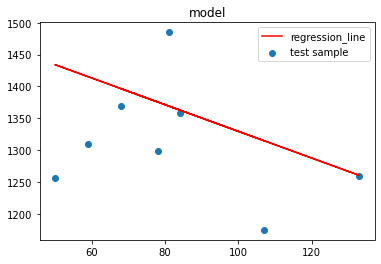

In [69]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')
plt.title('model')
plt.legend(['regression_line', 'test sample'])

In [ ]:
# данных очень мало для построения адекватной модели, очевидно она нерабочая

In [70]:
# остатки
resid = y_test - y_pred

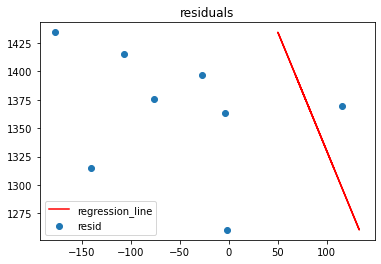

In [71]:
plt.scatter(resid, y_pred)
plt.title('residuals')
plt.plot(X_test, y_pred, c='r')
plt.legend(['regression_line', 'resid'])

In [ ]:
# видим сильные выбросы и расположении практически всех точек с одной стороны от линии регрессии